# Chapter 4: Image Gradients and Edge Detection

Edge detection is one of the fundamental operations when we perform image processing. It helps us reduce the amount of data (pixels) to process and maintains the structural aspect of the image. We're going to look into two commonly used edge detection schemes - the gradient (Sobel - first order derivatives) based edge detector and the Laplacian (2nd order derivative, so it is extremely sensitive to noise) based edge detector. Both of them work with convolutions and achieve the same end goal - Edge Detection.


## Sobel and Laplacian Edge detectors

In [1]:
import cv2
import os
import sys
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
 
# Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
 
# Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [3]:
from scipy import signal

def compute_gradients(img,laplacian,sobelX,sobelY):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")

    #Sobel X part
    img_SobelX =  cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 3, 2)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")

    #Sobel Y part
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")

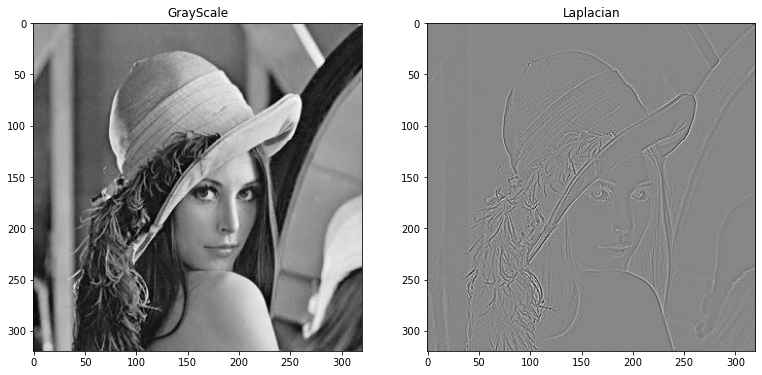

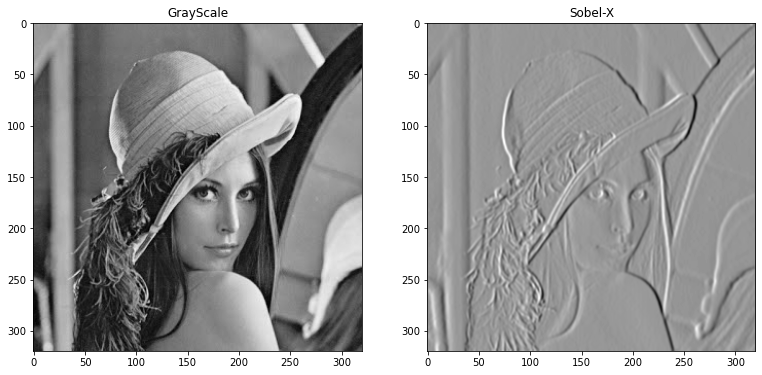

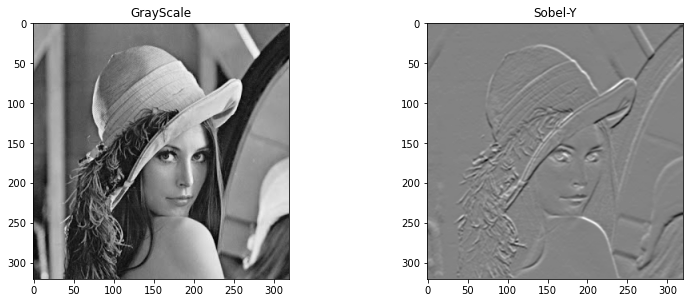

In [4]:
img = io.imread("./Images/image.jpg",1) #in skimage 1 is for grayscale
compute_gradients(img,laplacian,sobelX,sobelY)

## Canny Edge Detector
Canny Edge Detection is a popular multi-stage edge detection algorithm. Lets have a look at opencv version of an example image. 

OpenCV puts this multistage algorithm in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude.

Text(0.5, 1.0, 'Canny edge detector')

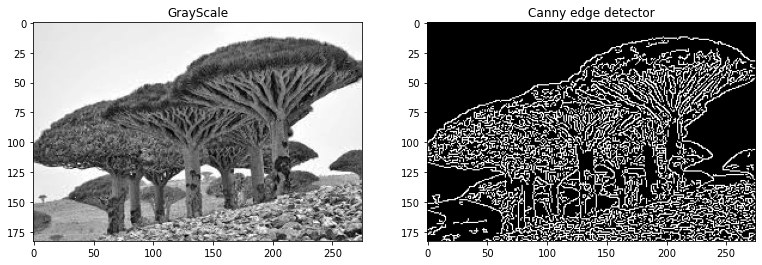

In [5]:
img = cv2.imread("Images/image2.jpg",0)
edges = cv2.Canny(img, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")

## Difference of Gaussian

Lets see an example of Gaussian smooting at different scales (it is recommended to look at gaussian smoothing in previous notebook).

In Gaussian Blurring, we discussed how the standard deviation of the Gaussian affects the degree of smoothing. Roughly speaking, larger the standard deviation more will be the blurring

Text(0.5, 1.0, 'Gaussian Filter, sigma=1')

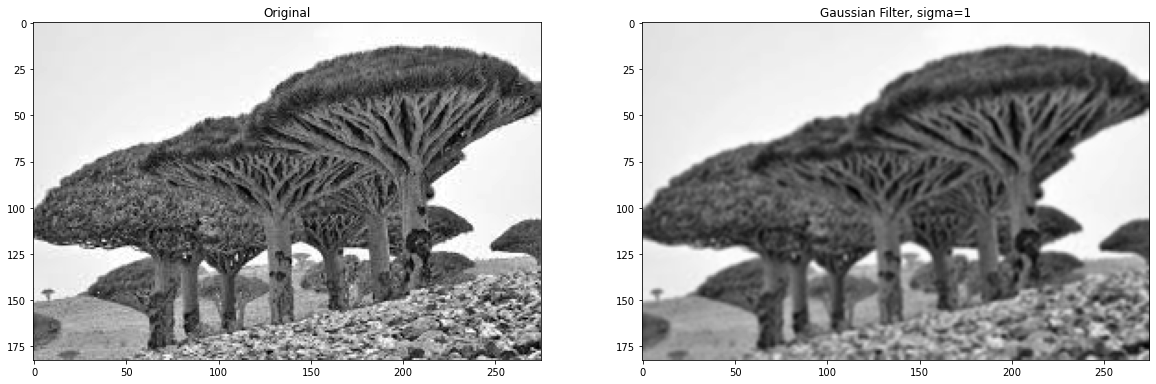

In [6]:
img_gaussianFilter = cv2.GaussianBlur(img, (3,3),sigmaX=1)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=1")

Text(0.5, 1.0, 'Gaussian Filter, sigma=5')

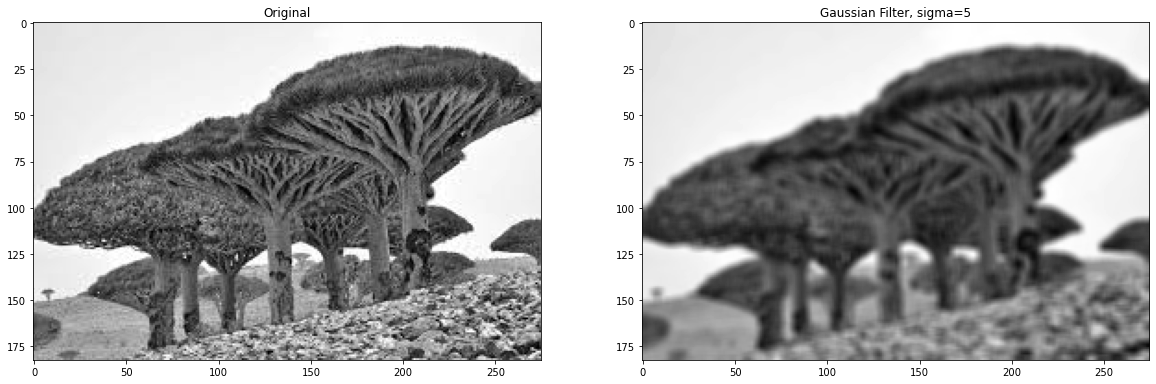

In [7]:
img_gaussianFilter = cv2.GaussianBlur(img, (5,5),sigmaX=3)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=5")

Text(0.5, 1.0, 'Gaussian Filter, sigma=10')

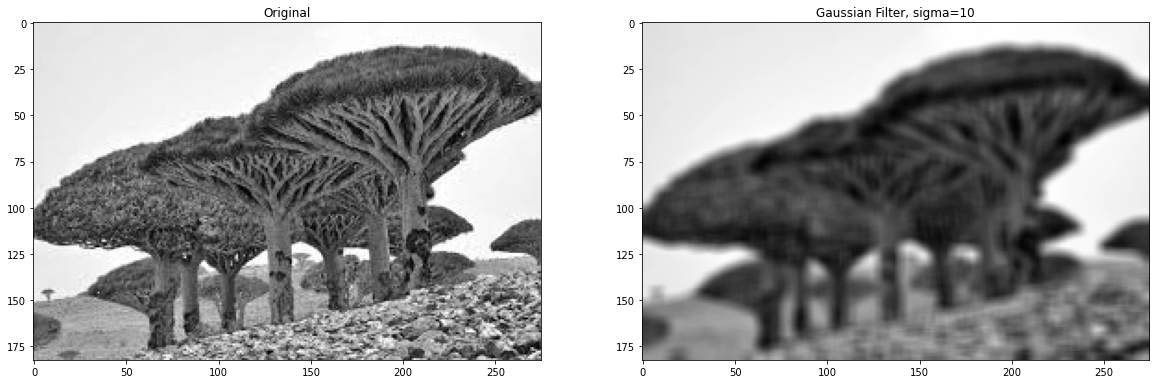

In [8]:
img_gaussianFilter = cv2.GaussianBlur(img, (7,7),sigmaX=10)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=10")

<b>DoG</b>: if we take 2 Gaussian kernels with different standard deviations, apply separately on the same image and subtract their corresponding responses, we will get an output that highlights certain high-frequency components based on the standard deviations used. All the remaining frequency components are assumed to be associated with the edges in the images. 

Text(0.5, 1.0, 'Difference of Gaussian')

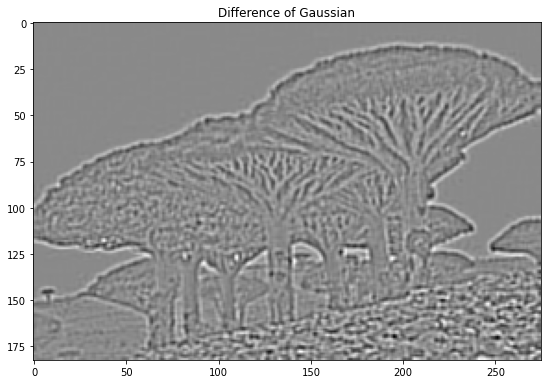

In [9]:
new_img = io.imread("./Images/image2.jpg",1)

low_sigma = cv2.GaussianBlur(new_img,(3,3),1)
high_sigma = cv2.GaussianBlur(new_img,(5,5),8)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(dog,cmap=plt.cm.gray)
plt.title("Difference of Gaussian")

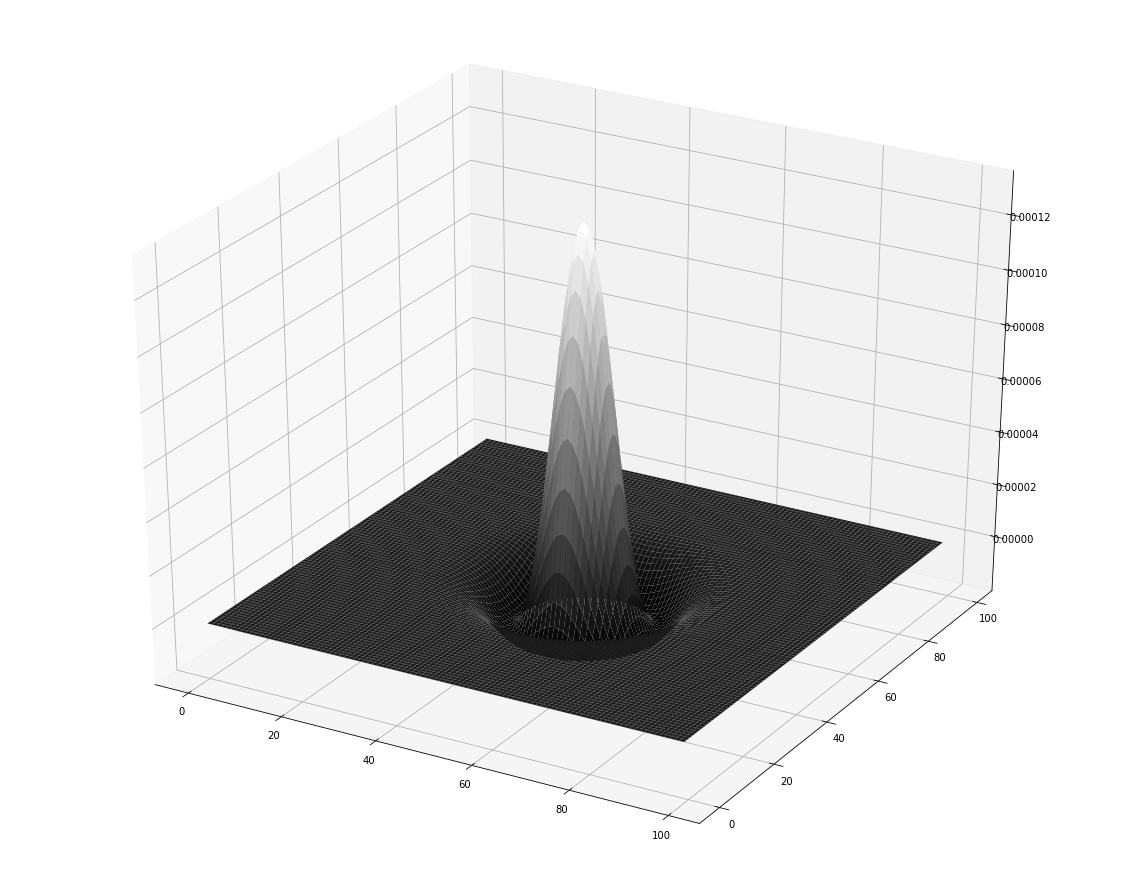

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import numpy as np

img = cv2.resize(dog,(100,100))

def plot_helper(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

N = 100
half_N = N // 2

x, y = np.mgrid[0:img.shape[0], 0:img.shape[1]]

#z = np.sin(0.02*x)*np.sin(0.02*y)

z = -plot_helper(x - half_N, y - half_N, sigma=7)

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

1 more example with variant sigmas

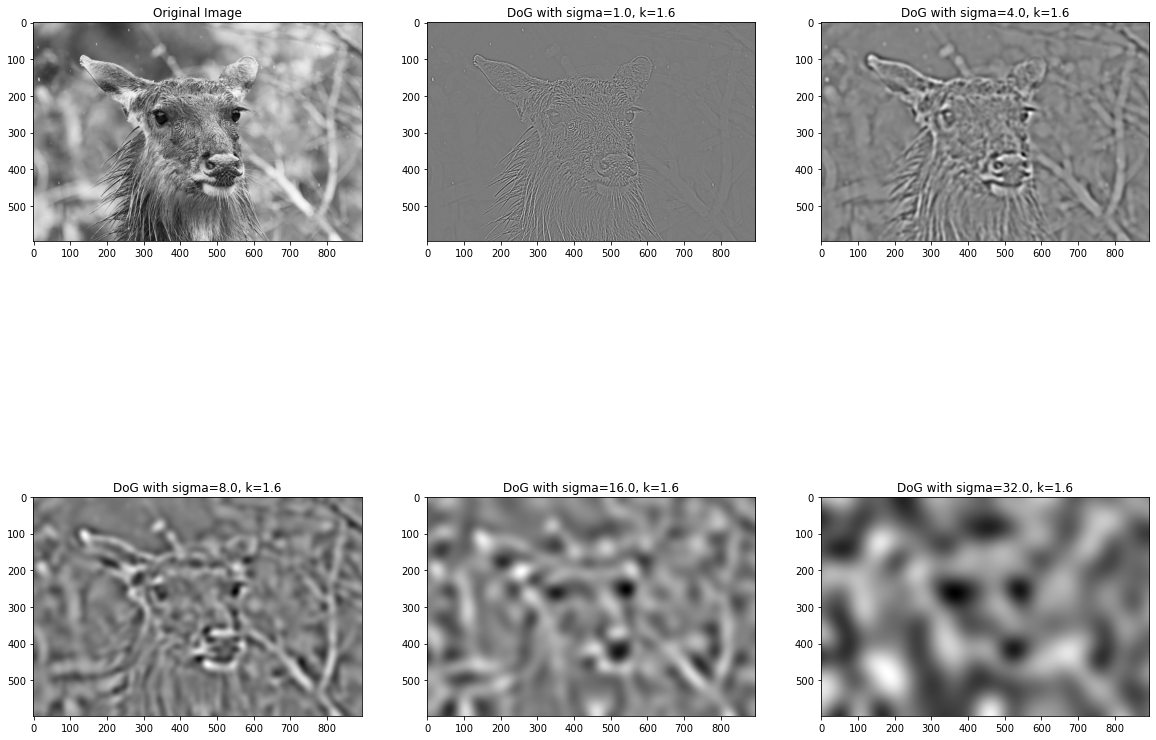

In [11]:
from skimage import data, feature, color, filters, img_as_float
from matplotlib import pyplot as plt


img = io.imread("./Images/image3.jpg",1)

k = 1.6 #multplier for sigmas

plt.subplot(2,3,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original Image")

#show DoGs with variant sigmas
for idx,sigma in enumerate([1.0,4.0,8.0,16.0,32.0]):
    s1 = filters.gaussian(img,k*sigma) #higher sigma
    s2 = filters.gaussian(img,sigma) #lower sigma

    # multiply by sigma to get scale invariance
    dog = s2 - s1
    plt.subplot(2,3,idx+2)
    plt.imshow(dog,cmap=plt.cm.gray)
    plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

plt.show()